# <font color='maroon'>Binomial distribution</font>

### Background

In the Prerequisites, we went through some examples of where binomial distributions are used frequently. These are typically cases where a success or failure is possible such as in:

* Risk estimation
* Process capability
* Sample size estimation
* Statistics tests
* Acceptance sampling
* Reliability analysis e.g. time to failure of a device
* Survey sampling

In this notebook, we will go back to a simplified example to get to the root of the concepts under Binomial Distribution so you can concentrate on the application using Python and Python libraries. We expect that you will then be able to apply the concepts and skills covered here in your work -- maybe even in some of the use cases listed above.

### The bad apple

Let's visit the local grocer in order to buy three apples. Chances are <b>10%</b> of the apples on display have gone bad. We examine each apple you pick up. There are two possible independent outcomes. We pick up either a bad apple or a good apple.<i><b> We're looking for bad apples, so we let bad apple equal the successful outcome and good apple equal failed outcome</b></i>. We choose to select three apples at random. We can list all possible outcomes of this procedure using a probability tree, and then answers questions like, what is the probability that exactly two apples selected at random are bad? 

<img src="images/apple.png"/>

Let's start at the root of the tree, which is on the left. The first two branches that emerge from the root indicate the outcomes of choosing the first apple. The top branch indicates the probability of choosing a bad apple, $p = 0.1$. The bottom branch shows the probability of choosing a good apple, $p=0.9$. After choosing the first apple, we move on to select the second apple. The second time around, we can select either a bad apple with probability $0.1$ or good apple with probability  $0.9$. We then move to select the third and final apple. The tree diagram shows all the possible outcomes after choosing three apples. Each branch in the tree is labelled with the probability of the outcome. We can determine the probability of choosing two bad apples by following the path from the root of the tree that includes the branches with the probabilities that indicate the chance of choosing a bad apple.

<img src="images/apples.png"/>

The probability of picking exactly two bad apples out of the three trials we've set ourselves is indicated by the branches marked in blue, red and green. We multiply probabilities along the same color branches and add probabilities between different color branches.

Probability trees are a neat way to illustrate all possible outcomes and their probabilities. But the tree can get really large as outcomes increase. Each branch shows the probability of success or failure. The depth of the tree indicates how many times an apple is selected. This number is called the trial in any experiment.  

As more and more apples are chosen, probability trees become impractical and the use of tools like Python become crucial in determining probability. In the steps below, we will walk-through simple to more complex computations of probability to understand how Python (libraries) ease this process for us.

We will start by calculating the probability of picking exactly two bad apples. But first, the usual: loading of the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random

In [2]:
%matplotlib inline

There is a formula that allows you to calculate this probability directly. It is given as follows:
\begin{align}
p(x) &= \binom{n}{x}p^x(1-p) \text{ for }x= 0,1,2,3,\ldots\\
   ~ &= 0 \text{ otherwise}
\end{align}
where $n=3$ the number of trials, $x=2$ the event of choosing exactly two bad apples, $p$ the probability of success. The probability of choosing a bad apple (success) is $p=0.1$, and the probability of choosing a good apple (failure) is  $(1-p)=0.9$.


Scipy and Numpy both provide functions for the binomial distribution. Let's use the <b> scipy</b> function. For more information on how to use the Numpy `numpy.random.binomial` function, see the documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html).

In [3]:
stats.binom.pmf(2,3,0.1) #calculate probability of 2 bad apples out of 3

0.027000000000000007

In [4]:
# Let us compute the same thing with numpy:
#np.random.binomial(2, 0.1, 3)

Here's what the arguments in the binom.pmf function mean:

    2 is the number of successful trials
    3 is the number of trials conducted in the experiment
    0.1 is the probability of success

#### Combinations

Let's go back to the binomial formula. The term $\binom{n}{x}$ returns the number of ways to choose $x$ items out of a set with $n$ elements without concern for the order in which you choose the items. With our example, how many ways are there to choose 2 bad apples out of 3? Let's use a function from the Combinations package to show us how many ways we can choose 2 items from a set of 3.  

In [5]:
from itertools import combinations
comb = combinations([1, 2, 3], 2)
for i in list(comb):
    print(i)

(1, 2)
(1, 3)
(2, 3)


## Visualization

We show the distribution using a bar graph. The graph shows how unlikely picking exactly 2 bad apples is.

In [6]:
n, p = 3, 0.1

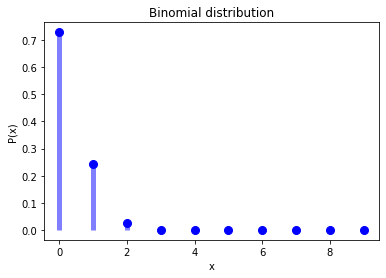

In [7]:
x= np.arange(0,10)
b = stats.binom.pmf(x,n,p)
plt.title('Binomial distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.plot(x,b,'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, b, colors='b', lw=5, alpha=0.5)

Let's see how the graph shifts when we vary the value of $p$ while keeping $n$ fixed. 

Starting with n = 3 and p = 0.3, we choose 5 apples. What is the probability that 2 of the 5 are bad?

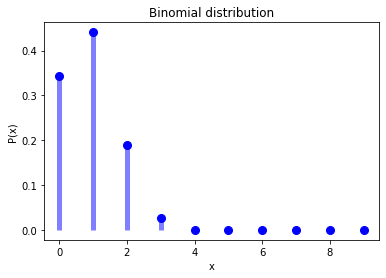

In [8]:
n, p = 3, 0.3
x= np.arange(0,10)
b = stats.binom.pmf(x,n,p)
plt.title('Binomial distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.plot(x,b,'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, b, colors='b', lw=5, alpha=0.5)

We see that as the probability increases of there being bad apples in the fruit stand, the chances of picking exactly 2 bad apples also goes up. The probability rises to 20%. Let's see what happens when the probability rises to 0.8, what are the chances of picking exactly two bad apples?

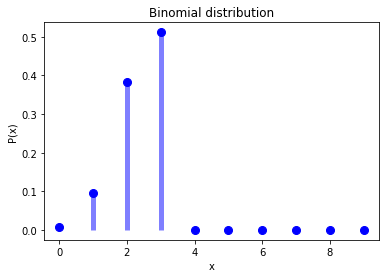

In [9]:
n, p = 3, 0.8
x= np.arange(0,10)
b = stats.binom.pmf(x,n,p)
plt.title('Binomial distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.plot(x,b,'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, b, colors='b', lw=5, alpha=0.5)

The probability goes up to 40% that you will choose exactly 2 bad apples.

## More on combinations

The term $\binom{n}{k}$ in the function,
\begin{align}
p(k) &= \binom{n}{k}p^x(1-p) \text{ for }k= 0,1,2,3,\ldots\\
   ~ &= 0 \text{ otherwise}
\end{align}

is a way of selecting $k$ elements out of the $n$ elements without regard to the arrangement of the choosen elements. The formula is given as 
\begin{align}
\binom{n}{k} &= \dfrac{n!}{k!(n-k)!},\\
\end{align}
where the term $n!$ is referred to as $n$-factorial and has the formula $$n! = n\times(n-1)\times\ldots \times (n-n + 1).$$ For example, $6! = 6 \times 5 \times 4 \times 3 \times 2 \times 1.$


In order to calculate combinations and permutations, we import the permutation and combination function from `scipy.misc`. 

In [10]:
from scipy.misc import factorial, comb

print(comb(10, 3, exact=True)) # 
print(factorial(6))

120
720.0


/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  after removing the cwd from sys.path.


In [11]:
#!pip install factorial
# !python3.7 -m pip install scipy==1.2 --upgrade

Let's now shift gears and calculate point estimates of the binomial distribution that provide a quick summary of the distribution. We'll look at:

* Expected Value
* Variance
* Standard Deviation


## Expected value

The expected value is the mean of a random variable. It is what is expected to happen in the long run after many trials of an experiment. So the expected value of choosing good a bad apple after 5 trials is $n*p$, where n is the number of trials and $p$ the probability of success (in this case, choosing a bad apple).

In [12]:
n = 5
p = 0.1
n*p

0.5

## Variance

The variance is given by $n*p(1-p)$. 

## Standard deviation

The standard deviation equals $\sqrt{n*p(1-p)}$

In [13]:
import math # import math to access sqrt
print('Mean', n*p)
print('Variance', n*p*(1-p))
print('Standard deviation', math.sqrt(n*p*(1-p)))

Mean 0.5
Variance 0.45
Standard deviation 0.6708203932499369


The random variable has mean 0.5. This means if you continue choosing apples at the stand, the average number of bad apples you come across would be 0.5 apples. 

## Cumulative probabillity distribution

What is the probability of choosing 2 or less bad apples? We need to find the probability of choosing zero apples plus choosing one apple plus choosing two apples. A cumulative density function will help us answer this question. It is stated as follows:

$$P(X \leq 2) = P(0) + P(1) + P(2).$$

The probability of choosing more than two bad apples from the fruit stand is gotten by subtracting one from the sum of probabilities that start at zero up to one.

\begin{align*}
P(X \geq 2) &=  1 - [P(X) \leq 1] \\
             &=  1 - [P(0) + P(1)] \\
\end{align*}



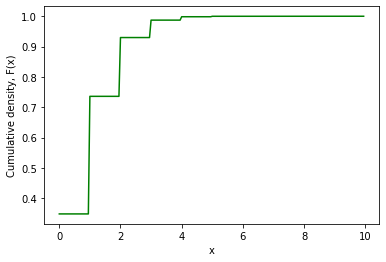

In [14]:
x = np.arange(0,10,.05)
y = stats.binom.cdf(x,    # probability of k = 5 successes or less
                10,       # with 10 trials
                p)      # success probability 0.8
plt.xlabel('x')
plt.ylabel('Cumulative density, F(x)')
plt.plot(x,y,'g-')

### Exercise

Using the cdf function, what is the probability of choosing 2 or less bad apples? What is the probability of choosing more than 2 bad apples?

In [15]:
# Let us use cdf function to compute the probability of choosing 2 or less bad apples
X = stats.binom(3, 0.1) # Declare X to be a binomial random variable
F2= X.cdf(2) # F(2) which is also P(X < 2)
F2

0.999

In [16]:
# What is the probability of choosing more than 2 bad apples?
1-F2 # Since P(X<2)+P(X>=2)= 1, we just then have P(X>=2)=1- P(X<2)= 1-F2

0.0010000000000000009

## References
For more on probability distributions see [Common Probability Distributions: The Data Scientist’s Crib Sheet](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/).